In [1]:
using SeisPlot, SeisAcoustic, LinearAlgebra

In [2]:
nz = 101; nx = 301;
vel = 3000 * ones(nz, nx);  # m/s
vel[51:end,:] .= 3500;  
rho = 2000 * ones(nz, nx);  # kg/m^3

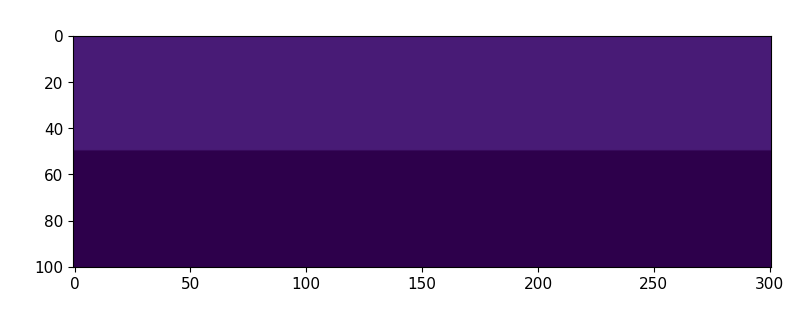

In [3]:
SeisPlotTX(vel, wbox=9, hbox=3);

In [4]:
# top boundary condition
free_surface = true    #(pml or free_surface)

# grid size
h = 10

# time step size and maximum modelling length
dt = 0.001; tmax = 2.0;  # use second as unit

In [7]:
# time and frequency domain stencil
fparams = FdParams(rho, vel, free_surface, h; data_format=Float64);
tparams = TdParams(rho, vel, free_surface, h, h, dt, tmax; data_format=Float64);

In [8]:
# source term
src = Source(2, 150, fparams; dt=dt, amp=100000);

In [9]:
# recordings generate in time domain and frequency domain
irx = collect(1 : 2 : fparams.nx);
irz = 2 * ones(length(irx));
frec= Recordings(irz, irx, dt, tmax, fparams);
trec= Recordings(irz, irx, tparams);

In [10]:
# forward modeling in frequency domain
get_recordings!(frec, src, fparams);

# time domain
multi_step_forward!(trec, src, tparams);

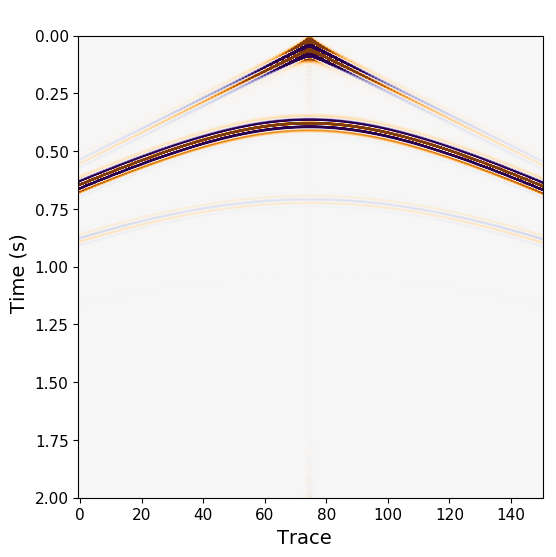

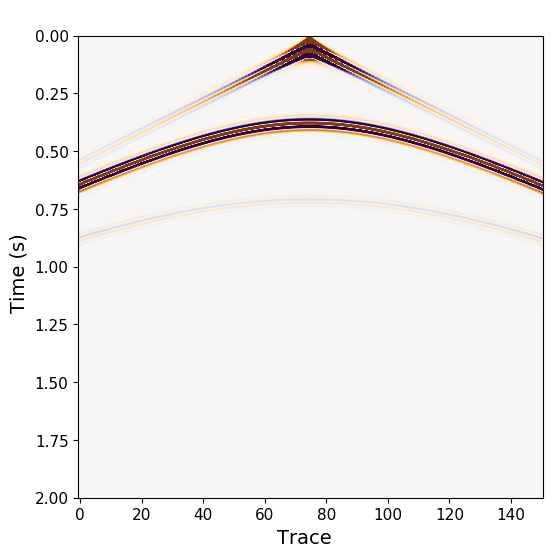

In [11]:
# plotting the shot records
SeisPlotTX(frec.p, dy=0.001, ylabel="Time (s)", xlabel="Trace");
SeisPlotTX(trec.p, dy=0.001, ylabel="Time (s)", xlabel="Trace");

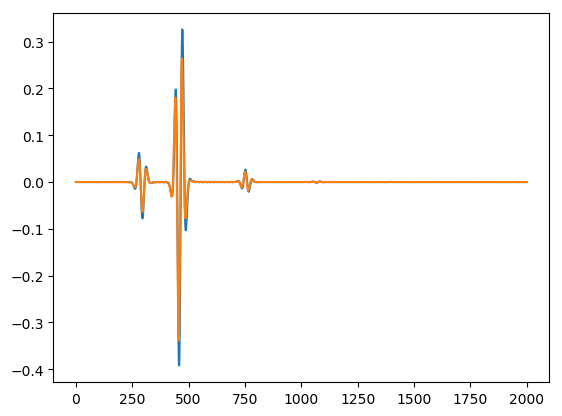

In [12]:
using PyPlot
j = 40;
plot(frec.p[:,j]); plot(trec.p[:,j]);